In [160]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
churn = pd.read_csv('churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Удаляем ненужный столбец RowNumber

In [161]:
churn.drop('RowNumber', axis=1, inplace=True) #Удаляем ненужный столбец RowNumber
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Задание 1
##### Соотношение ушедших и лояльных клиентов

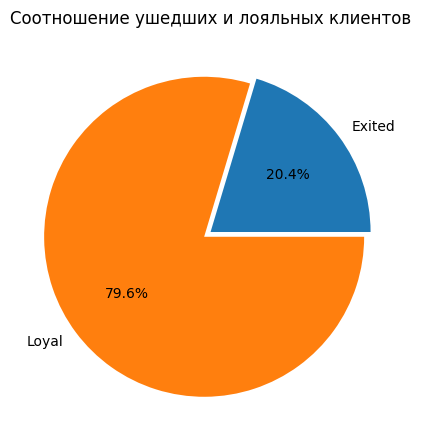

In [162]:
exited_cl = (churn['Exited']==1).sum() # Кол-во ушедших клиентов
loyal_cl = (churn['Exited']==0).sum() # Кол-во лояльных клиентов

labels = ['Exited', 'Loyal']
sizes = [exited_cl, loyal_cl]
explode = (0, 0.05)

fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов')
axes.pie(
    sizes,
    labels=labels,
    autopct='%.1f%%',
    explode = explode
);

Для визуализации данной задачи лучше всего подошло использование круговой диаграммы, т.к. нам нужно выделить всего 2 параметра из целого количества клиентов, которое состовляет 100%. На диаграмме отчетливо видно, что количество лояльных клиентов - 79,6% значительно превышает количество ушедших - 20,4%.

#### Задание 2
##### Распределение баланса пользователей, у которых на счету больше 2 500 долларов

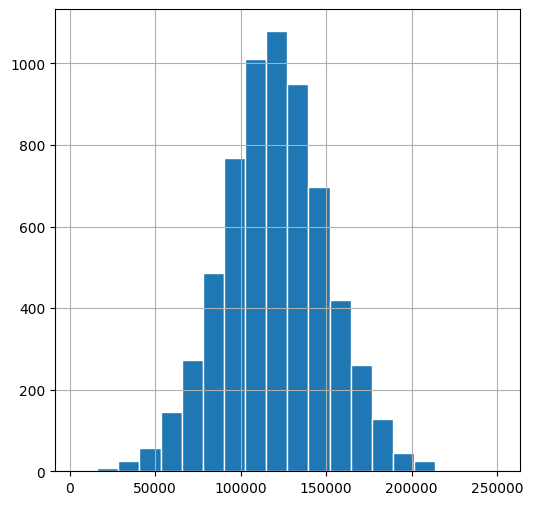

In [163]:
big_balance = churn[churn['Balance'] > 2500].reset_index(drop=True)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
y = big_balance['Balance']
ax.hist(y, bins=20, edgecolor="white")
ax.grid()
plt.show()

In [164]:
display(round(big_balance['Balance'].min())) #  Минимальный баланс клиентов
display(round(big_balance['Balance'].max())) #  Максимальный баланс клиентов
display(round(big_balance['Balance'].mean())) #  Средний баланс клиентов

3769

250898

119827

Для данной задачи больше всего подходит гистограмма распределения. На ней прослеживается явное соответствте нормальному закону распределения. Баланс большинства клиентов составляет в среднем от 100000 до 150000 долларов. Также видно, что клиентов с высоким и низким балансом значительно меньше и их количество примерно одинаково. Помимо этого мы вычислили максимальный, минимальный и средний баланс клиентов на счету у которых более 2500 долларов.

#### Задание 3
##### Распределение баланса клиента в разрезе признака оттока.

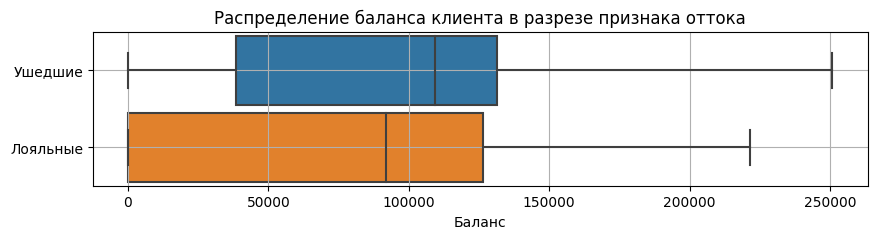

In [165]:
#Для лучшей читаемости диаграммы создадим новый признак лояльных и ушедших клиентов
churn['exited_clients'] = churn['Exited'].apply(lambda x: "Ушедшие" if x == 1 else "Лояльные")
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn,
    y='exited_clients',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('');
boxplot.grid()

Для данной задачи мы применили коробчатую диаграмму. Она показывает, что медианое значение баланса лояльных клиентов меньше, чем у ушедших. Также видно, что баланс основной части клиентов варируется от минимальных значений до примерно 120000 долларов. Можно предположить, что банк ориентируется на клиентов с низким доходом, например, дает кредиты, рассрочки и т.д, но имеет узкий спектор услуг для клиентов со средним достатком, например, нет предложений по вкладам с доходным процентом, что приводит к оттоку таких клиентов.

#### Задание 4
##### Распределение возраста в разрезе признака оттока

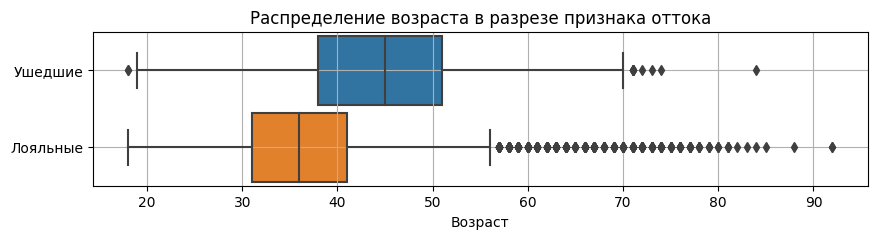

In [166]:
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn,
    y='exited_clients',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('');
boxplot.grid()

#((churn['Age'] > 90) & (churn['Exited'] == 0)).sum()

На диаграмме видно, что возрастной диапазон ушедших больше, чем лояльных клиентов. Оснавная часть ушедших клиентов среднего возраста: примерно от 38 до 51 года, а медианное значение лояльных клиентов банка значительно ниже: примерно 36 лет. Также у лояльных клиентов большое число потенциальных выбросов после 56 лет. Можно предположить, что услуги банка в большей степени ориентированны на клиентов от 32 до 42 лет, что хорошо согласуется с результатами диаграммы из предыдущей задачи. Как правило, у молодых людей еще нет накоплений, они не задумываются о вкладах, но могут много тратитить и брать кредиты. Возможно они являются зарплатными клиентами банка. Чтобы сохранить клиентов, банку следует обратить внимание на возрастную группу от 55 лет и старше.

#### Задание 5
##### Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

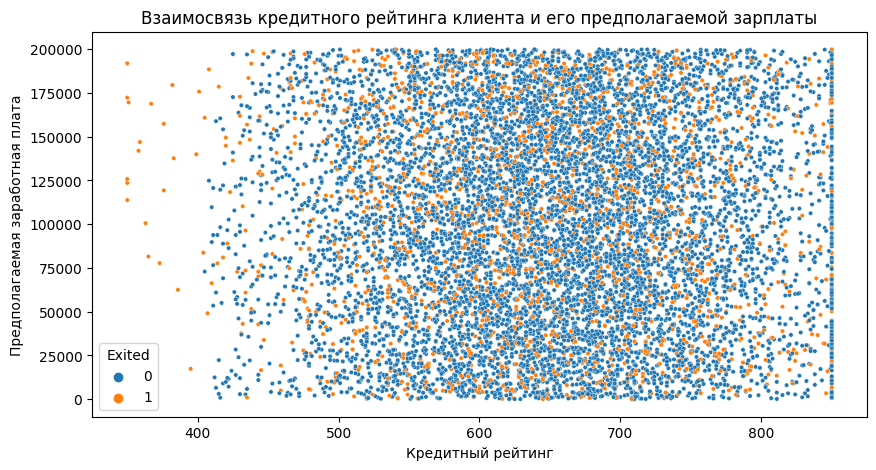

In [167]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=10,
    sizes=(100, 300)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=12)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая заработная плата');

Применим диаграмму рассеивания. Явной взаимосвязи между предполагаемой заработной платой и кредитным рейтингом клиента не наблюдается. Так же не наблюдается взаимосвясь с признаком оттока клиентов. Однако можно сделать предположение, что клиентов со средним кредитным рейтингом от 550 до 750 в банке больше всего, об этом говорит максимальная плотность точек в центре диаграммы.

#### Задание 6
#####  Кто чаще уходит, мужчины или женщины?

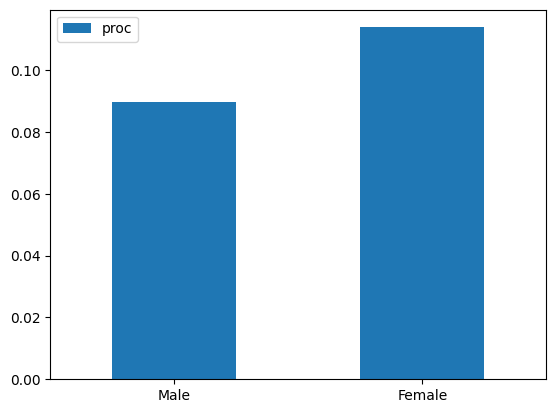

In [168]:
#(churn['Exited'] == 1).mean() # Процент всех ушедших
male = ((churn['Gender'] == 'Male') & (churn['Exited'] == 1)).mean() # Процент ушедших мужчин
female = ((churn['Gender'] == 'Female') & (churn['Exited'] == 1)).mean() # Процент ушедших женщин
index = ['Male', 'Female']
df = pd.DataFrame({'Gender': ['Male', 'Female'], 'proc':[male, female]}, index=index) # Создадим временный датафрейм для визуализации
ax = df.plot.bar(rot=0)

Воспользуемся самым простым методом постороения столбчатой даграммы. По данному графику видно, что женщины уходят чаще, чем мужчины - 11% и 9% соответственно.

#### Задание 7
#####  Отток клиентов от количества услуг

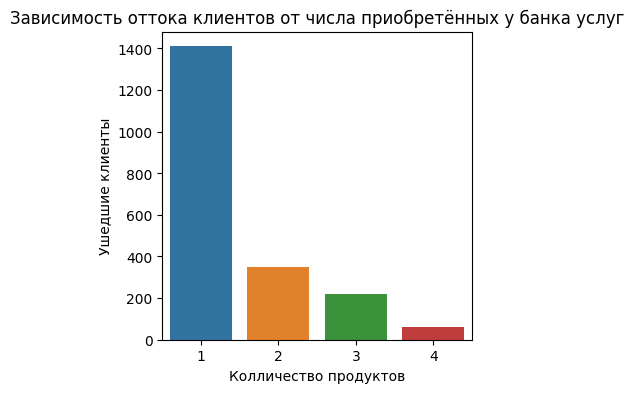

In [184]:
num_prod = pd.DataFrame(churn.groupby(['NumOfProducts'],as_index=False)['Exited'].sum()) # Сгруппируем данные по количеству услуг и создадим новый датафрейм

fig = plt.figure(figsize=(4, 4))
barplot = sns.barplot(
    data = num_prod,
    x = 'NumOfProducts',
    y = 'Exited',
    )
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг')
barplot.set_xlabel('Колличество продуктов')
barplot.set_ylabel('Ушедшие клиенты');



На данной диаграмме отчетливо видно, что отток клиентов напрямую зависит от количества преобретенных у банка услуг.
При максимальном количестве услуг равным 4-м, отток клиентов будет минимальный.

#### Задание 8
#####   Зависимость оттока клиентов от наличия активного статуса

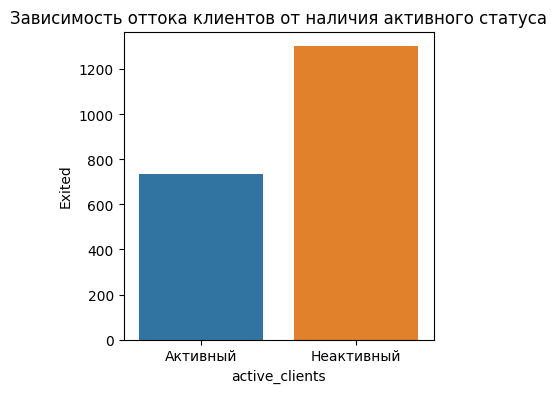

In [170]:
#Для лучшей читаемости диаграммы создадим новый признак активного статуса клиентов
churn['active_clients'] = churn['IsActiveMember'].apply(lambda x: "Активный" if x == 1 else "Неактивный")

activeMember = pd.DataFrame(churn.groupby(['active_clients'])['Exited'].sum()) # Сгруппируем данные по статусу активности и создадим новый датафрейм

fig = plt.figure(figsize=(4, 4))
barplot = sns.barplot(
    data = activeMember,
    x = activeMember.index,
    y = 'Exited'
)
barplot.set_title('Зависимость оттока клиентов от наличия активного статуса');


Для решения этой задачи также воспользуемся многоуровневой столбчатой диаграммой. Здесь отчетливо видно, что активные клиетны покидают банк почти в 2 раза реже. Банку сдедует обратить внимание на поддержание активности клиентов, чтобы сократить отток. Возможно банку следует раширить спектр услуг, предложить выгодные кредиты.

#### Задание 9
##### В какой стране доля ушедших клиентов больше?

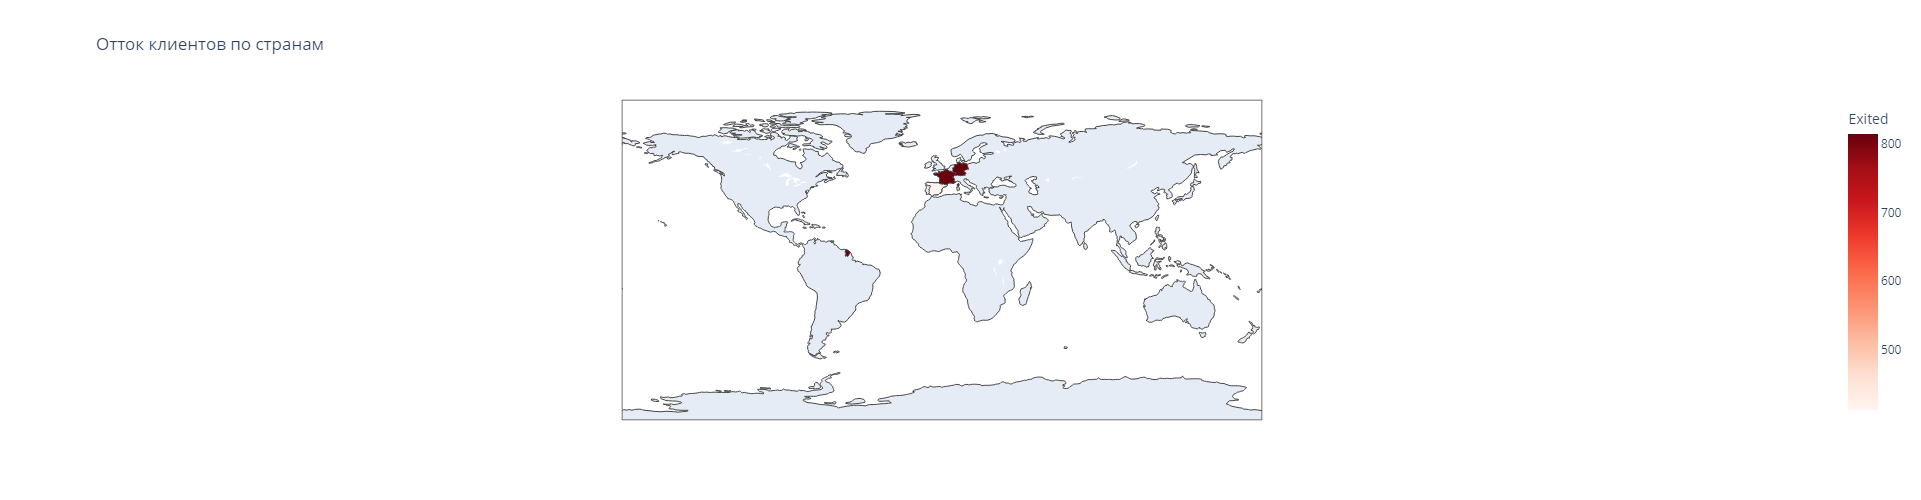

In [171]:
# Сгруппируем данные по странам и создадим новый датафрейм
exited_country = pd.DataFrame(churn.groupby(['Geography'],as_index=False)['Exited'].sum())

fig = px.choropleth(
    data_frame=exited_country,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Отток клиентов по странам',
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds',
    #center ='lat'
)
fig.show()

На данной катре видно, что отток клиентов в испании почти в 2 раза меньше, чем во Франции и Германии.

#### Задание 10
##### Категории клиентов, которые уходят чаще всего

In [172]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

churn_pivot = pd.pivot_table(churn, values='Exited', index='CreditScoreCat', columns='Age', aggfunc='mean')
churn_pivot

Age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
CreditScoreCat,,,,,,,,,,,,,,,,,,,,,
Excellent,0.000000,0.0,0.250000,NaN,0.125000,0.142857,0.000000,0.000000,0.083333,0.117647,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
Fair,0.166667,0.0,0.083333,0.000000,0.090909,0.041667,0.100000,0.121212,0.065217,0.036364,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Good,0.100000,0.0,0.000000,0.037037,0.166667,0.071429,0.127660,0.035714,0.087500,0.029412,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0
Poor,0.000000,0.2,0.000000,0.181818,0.100000,0.043478,0.133333,0.000000,0.058824,0.113208,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
Very_Poor,NaN,0.0,0.000000,0.000000,0.400000,0.000000,0.100000,0.000000,0.000000,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


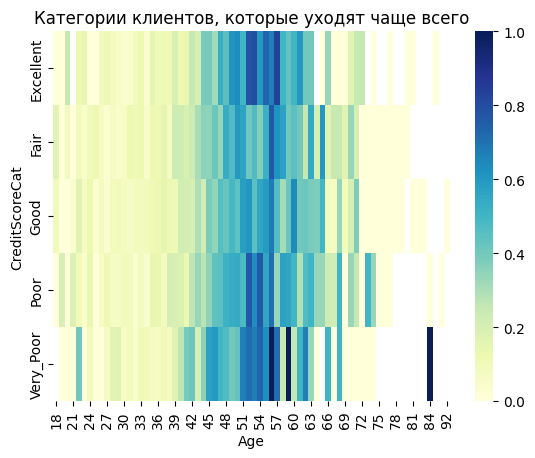

In [173]:
heatmap = sns.heatmap(data=churn_pivot, cmap='YlGnBu')
heatmap.set_title('Категории клиентов, которые уходят чаще всего', fontsize=12);

На тепловой карте видно, что наибольший отток клиентов из всех категорий наблюдается в возрастной группе примерно от 45 до 65 лет. В то же время в категориях "Good", "Fair" отток клиентов несколько ниже чем в остальных категориях. Также отчетливо видно, что в категории "Very_Poor" в некоторых возрастных группах отток клиентов максимальный.